In [1]:
from tigermyo.utils import *
from tigermyo.predict import *
from tigermyo.layering import * 
from tigermyo.aha import * 
from tigermyo.registration import *
from tigermyo.selector import *
import matplotlib.pyplot as plt

Please enter Folder PATH below

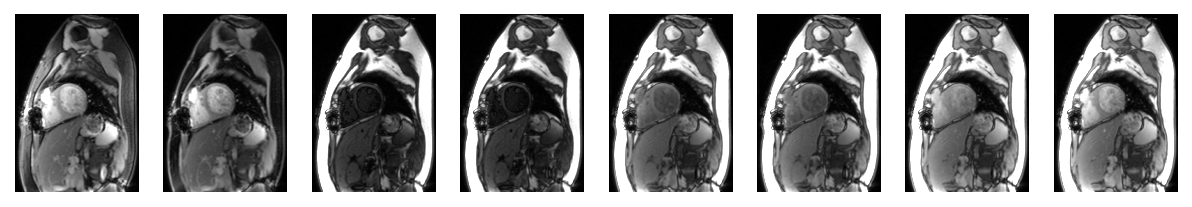

In [2]:
im, invtime = read_molli_dir("./testDataM/")

plt.figure(figsize=(10,3), dpi=150)
for i in range(im.shape[0]):
    plt.subplot(1,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
plt.show()

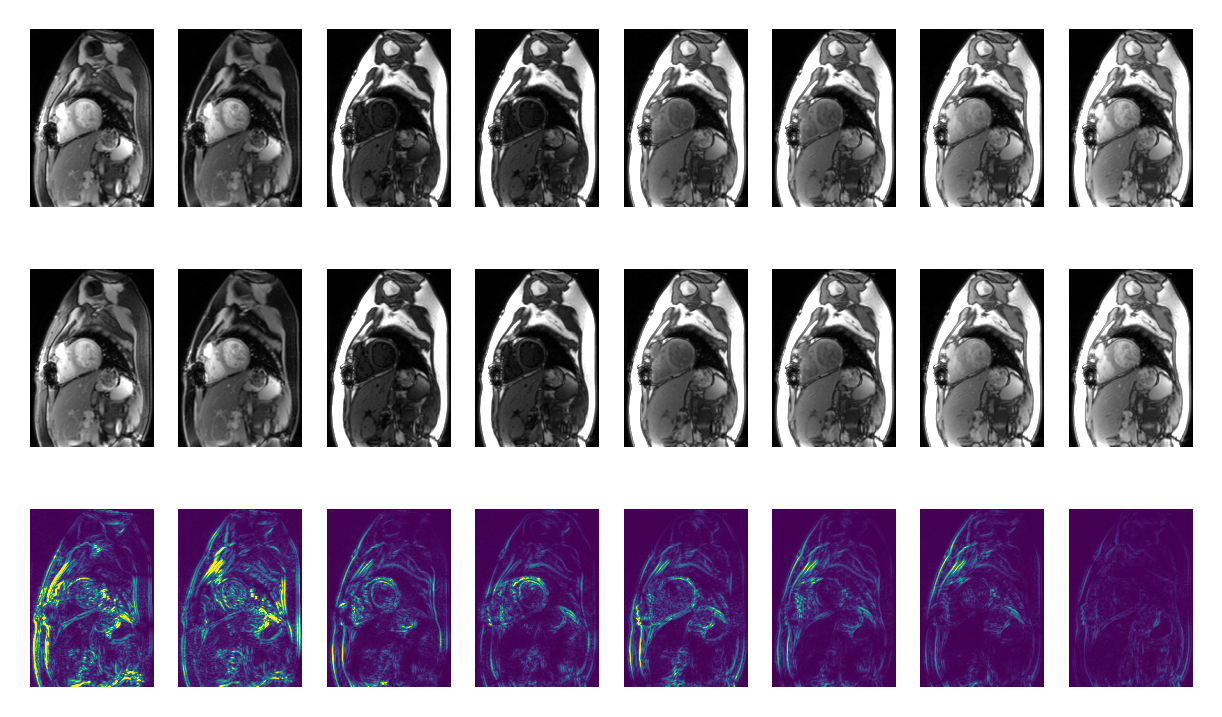

In [3]:
moco_im, invtime = read_molli_dir("./testDataM_MOCO/")

plt.figure(figsize=(5,3), dpi=300)
for i in range(moco_im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(moco_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(moco_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

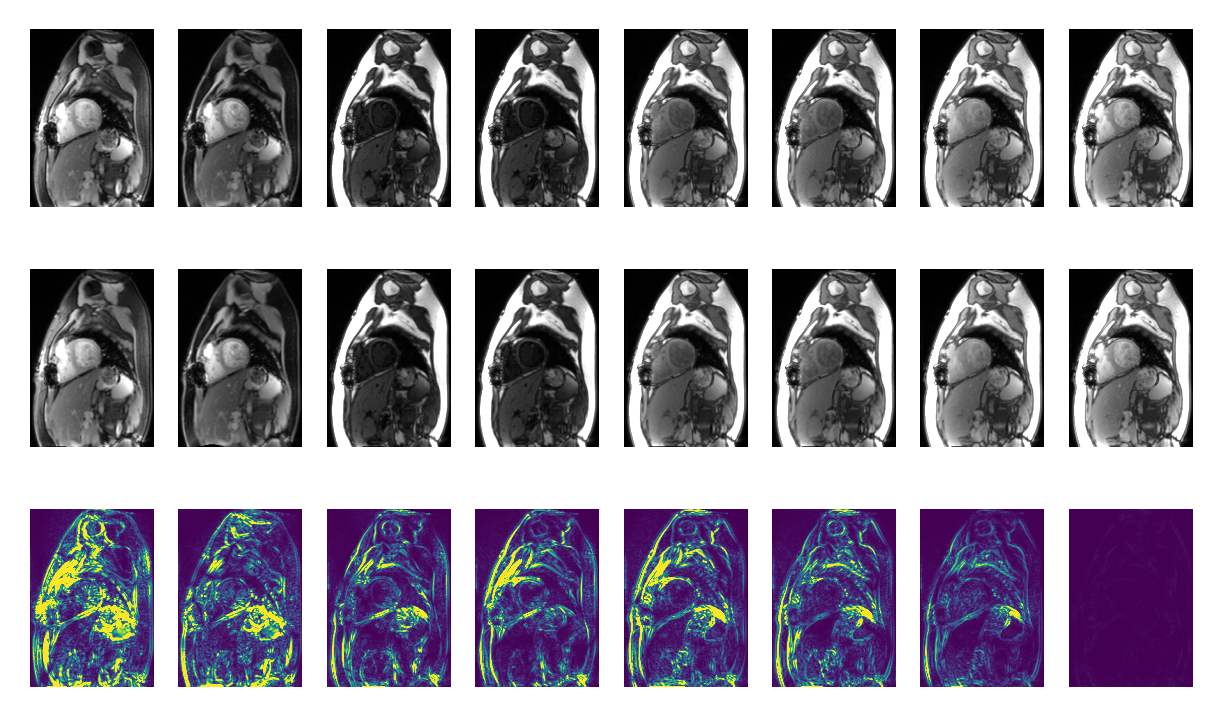

In [4]:
regedToLast_im = regToLast(im)

plt.figure(figsize=(5,3), dpi=300)
for i in range(im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(regedToLast_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(regedToLast_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

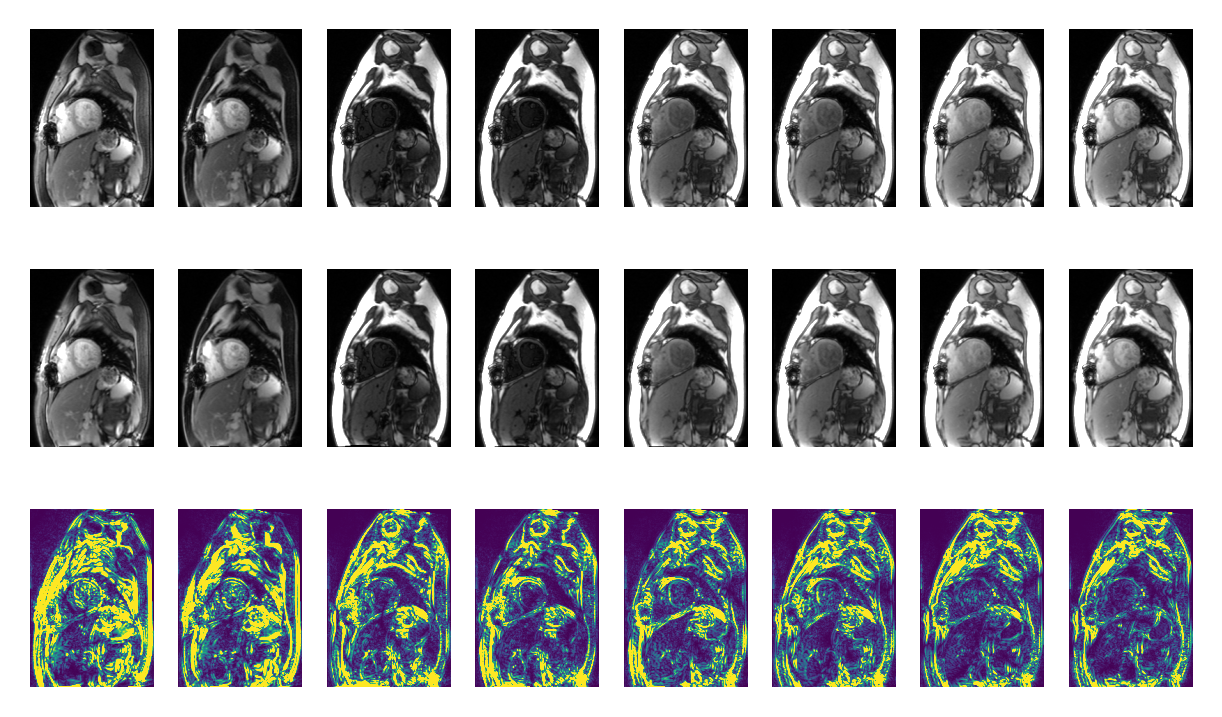

In [5]:
regedToLast2All_im = regToLast2All(im)

plt.figure(figsize=(5,3), dpi=300)
for i in range(im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(regedToLast2All_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(regedToLast2All_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

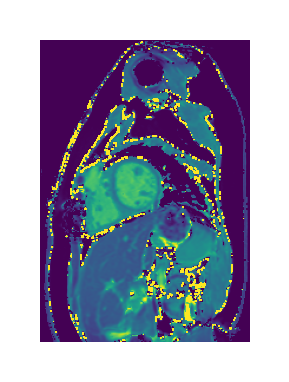

In [6]:
T1_dict = T1mapCal(im, invtime)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(T1_dict['T1map'], vmax=2500, vmin=300)
plt.show()

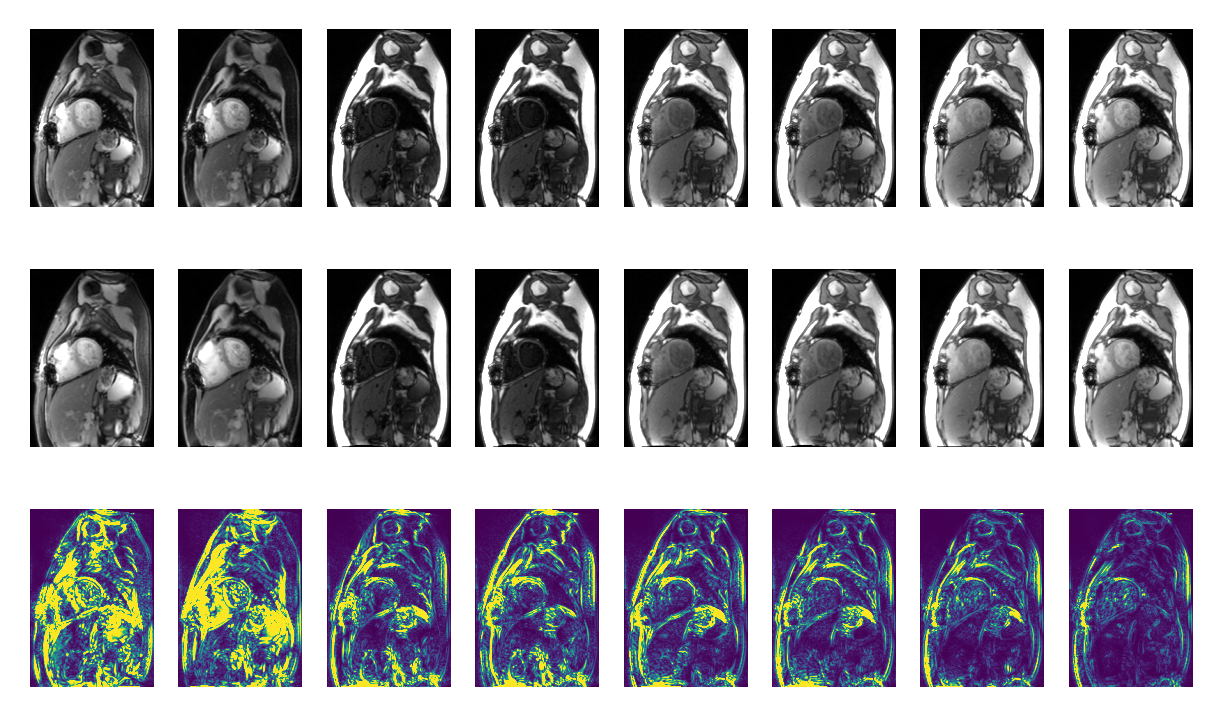

In [7]:
regedToLast2T1starAB_im = regToLast2T1starAB(im, invtime, T1_dict['Amap'], T1_dict['Bmap'])

plt.figure(figsize=(5,3), dpi=300)
for i in range(im.shape[0]):
    plt.subplot(3,im.shape[0],i+1)
    plt.axis('off')
    plt.imshow(im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0])
    plt.axis('off')
    plt.imshow(regedToLast2T1starAB_im[i, ...], cmap='gray', vmax=500, vmin=0)
    plt.subplot(3,im.shape[0],i+1+im.shape[0]*2)
    plt.axis('off')
    plt.imshow(abs(regedToLast2T1starAB_im[i, ...] - im[i, ...]), vmax=50, vmin=0)
plt.show()

In [8]:
reged_ims = [im, regedToLast_im, regedToLast2All_im, regedToLast2T1starAB_im, moco_im]

reged_ims_table, best_idx = selector(reged_ims, invtime)

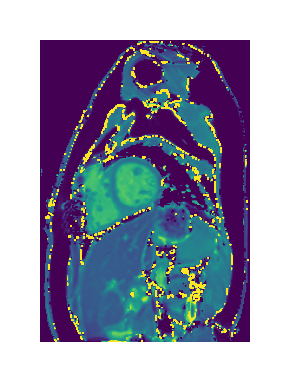

In [9]:
T1map = reged_ims_table[best_idx]['T1map']
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(T1map, vmax=2500, vmin=300)
plt.show()

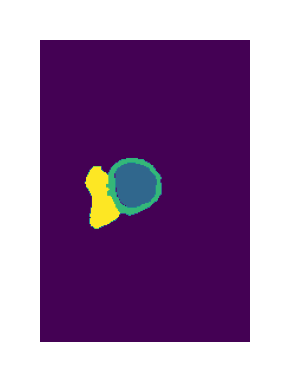

In [10]:
mask = predict_mask(T1map)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(mask, vmax=3, vmin=0)
plt.show()

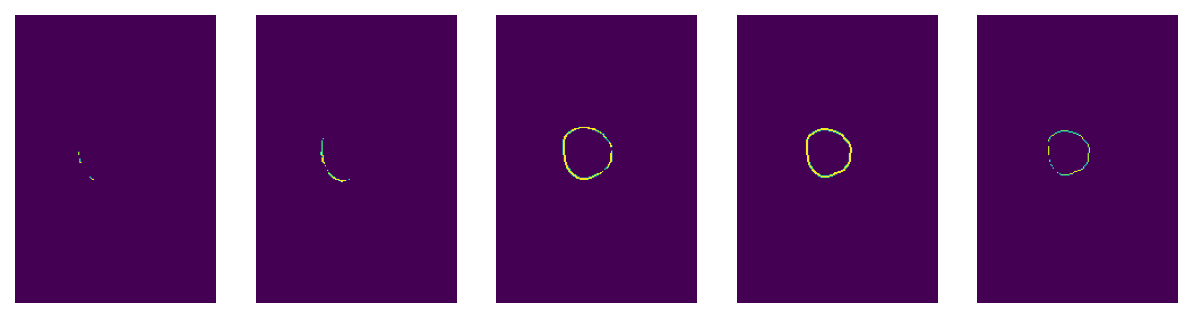

In [11]:
mask_layer = layering(mask, 5)
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(mask_layer)):
    plt.subplot(1,len(mask_layer),i+1)
    plt.axis('off')
    plt.imshow(mask_layer[i], vmax=1, vmin=0)
plt.show()

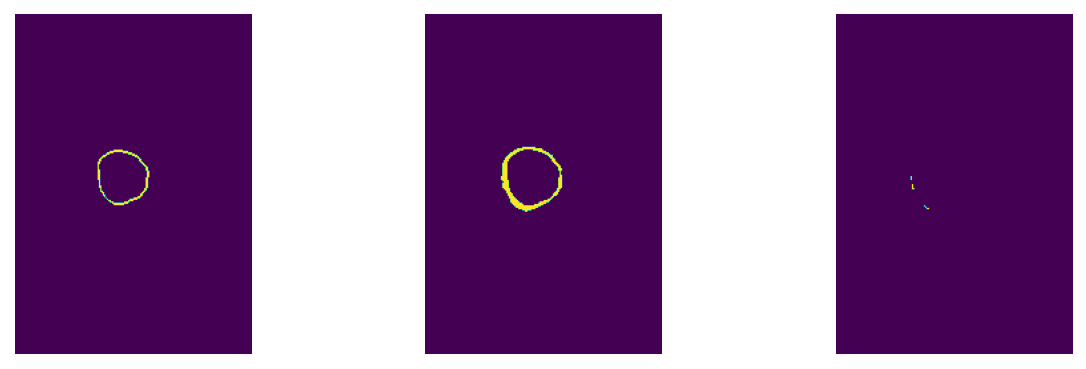

In [12]:
mask_layer = layering_percent(mask, 0.7, 0.3)
plt.figure(figsize=(10,3), dpi=150)
for i in range(len(mask_layer)):
    plt.subplot(1,len(mask_layer),i+1)
    plt.axis('off')
    plt.imshow(mask_layer[i], vmax=1, vmin=0)
plt.show()

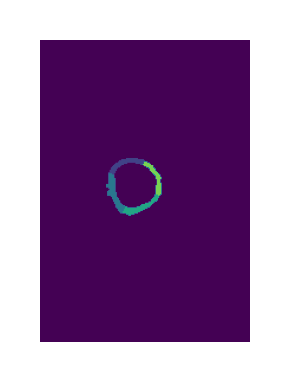

In [13]:
aha_seg = get_ahaseg(mask, nseg=4)
plt.figure(figsize=(1,1), dpi=400)
plt.axis('off')
plt.imshow(aha_seg, vmax=5, vmin=0)
plt.show()

Be careful! <br>
I use same slice to simulate the data of all slices

In [14]:
T1 = []

#########  Slice B  ############
aha_seg = get_ahaseg(mask, nseg=6)
T1map_i = np.ndarray(shape=(6,T1map.shape[0],T1map.shape[1]))
for i in range(6):
    T1map_i[i] = T1map*(aha_seg==i+1)
    T1map_i[i][T1map_i[i] == 0] = np.nan
    T1.append(np.nanmedian(T1map_i[i]))

#########  Slice M  ############
aha_seg = get_ahaseg(mask, nseg=6)
T1map_i = np.ndarray(shape=(6,T1map.shape[0],T1map.shape[1]))
for i in range(6):
    T1map_i[i] = T1map*(aha_seg==i+1)
    T1map_i[i][T1map_i[i] == 0] = np.nan
    T1.append(np.nanmedian(T1map_i[i]))

#########  Slice A  ############
aha_seg = get_ahaseg(mask, nseg=4)
T1map_i = np.ndarray(shape=(4,T1map.shape[0],T1map.shape[1]))
for i in range(4):
    T1map_i[i] = T1map*(aha_seg==i+1)
    T1map_i[i][T1map_i[i] == 0] = np.nan
    T1.append(np.nanmedian(T1map_i[i]))

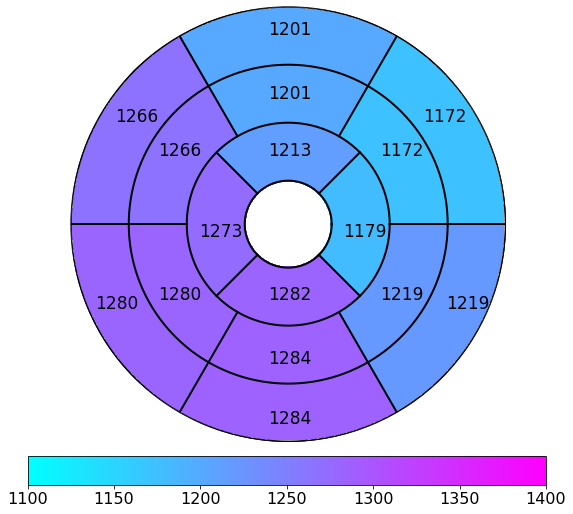

In [15]:
# Create the fake data
data = T1


# Make a figure and axes with dimensions as desired.
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1,
                    subplot_kw=dict(projection='polar'))
fig.canvas.manager.set_window_title('Left Ventricle Bulls Eyes (AHA)')

# Create the axis for the colorbars
axl = fig.add_axes([0.06, 0.05, 0.9, 0.05])


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=1100, vmax=1400)
# Create an empty ScalarMappable to set the colorbar's colormap and norm.
# The following gives a basic continuous colorbar with ticks and labels.
cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
            cax=axl, orientation='horizontal') # cax=axl, orientation='horizontal', label='T1(ms)')
cbar.ax.tick_params(labelsize=16)


# Create the 17 segment model
bullseye_plot(ax, data,cmap=cmap, norm=norm)
# ax.set_title('Bulls Eye (AHA)')
# temp_T = np.around(T1, decimals=2, out=None)
temp_T = [int(x) for x in T1]

for text,xytext, color in zip(*[temp_T,[(0.465, 0.825),(0.2, 0.675),(0.165, 0.35),(0.465, 0.15),(0.775, 0.35),(0.735, 0.675),(0.465, 0.715),(0.275, 0.615),(0.275, 0.365),(0.465, 0.255),(0.66, 0.365),(0.66, 0.615),(0.465, 0.615),(0.345, 0.475),(0.465, 0.365),(0.595, 0.475)],['k','k','k','k','k','k','k','k','k','k','k','k','k','k','k','k']]):
    ax.annotate(text,
                xy=(0,0),  # theta, radius
                xytext=xytext,    # fraction, fraction
                textcoords='figure fraction',
                horizontalalignment='left',
                verticalalignment='bottom',
                color=color,
                size=17
                )

plt.show()
plt.close('all')